In [1]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Load Data

In [2]:
df = pd.read_csv(pm.get_data("babies.csv"))

<Axes: xlabel='Month', ylabel='Length'>

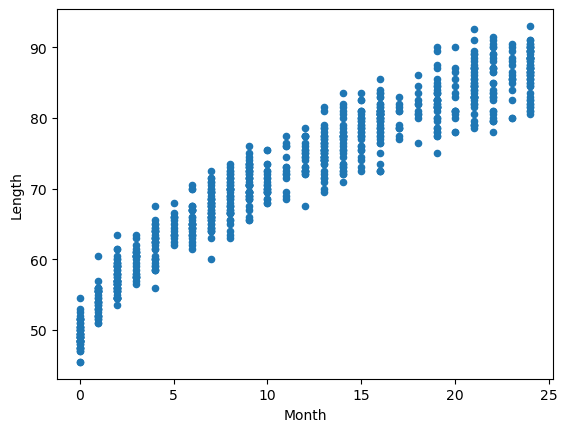

In [4]:
df.plot.scatter(x='Month', y='Length')

In [9]:
pm.find_constrained_prior(pm.Normal, lower=45, upper=55, mass=0.95, 
                          init_guess={'mu':50, 'sigma':10})

{'mu': 50.01626553970974, 'sigma': 2.55101545567434}

In [14]:
with pm.Model() as m:
    month = pm.Data('month', df.Month)
    length = pm.Data('length', df.Length)

    intercept = pm.Normal('intercept', mu=0, sigma=100)
    slope = pm.Normal('slope', mu=0, sigma=10)
    mu = pm.Deterministic('mu', intercept + slope * month)
    sigma = pm.Exponential('sigma', lam=1)

    length_hat = pm.Normal('length_hat', mu=mu, sigma=sigma, observed=length)

/Users/jessegrabowski/mambaforge/envs/cge-dev/lib/python3.11/site-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


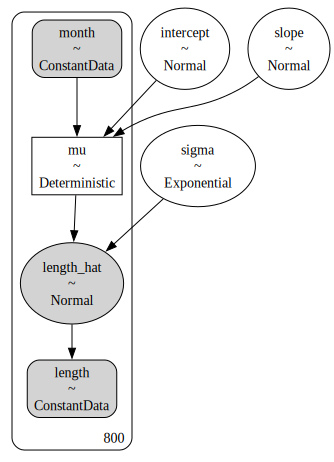

In [15]:
pm.model_to_graphviz(m)

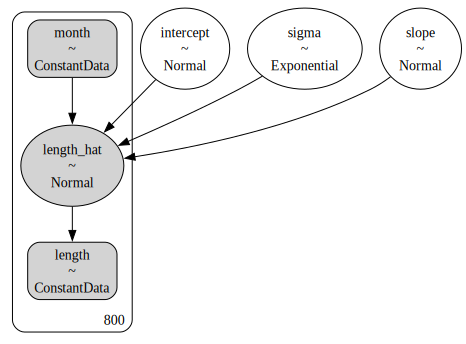

In [13]:
pm.model_to_graphviz(m)